In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydc.tools.import_data import import_businesses, import_reviews
from ydc.tools.supercats import add_supercats
import scipy.stats as stats
%matplotlib inline

ImportError: No module named 'scipy'

In [48]:
df_b0 = import_businesses()
df_r0 = import_reviews()

In [49]:
(df_b, cat_dict) = add_supercats(df_b0)

In [167]:
# Create mapping with business id and categories
busi_dict = {}
iterator = df_b[['business_id','super_category','sub_category', 'stars']].iterrows()
for idx, (bus_id, sup, sub, stars) in iterator:
    busi_dict[bus_id] = (sup,
                         sub,
                         cat_dict[sup]['name'],
                         cat_dict[sup]['sub_categories'][sub]['name'])

In [168]:
df_r = df_r0.copy(deep=True)
df_r['super_category'], df_r['sub_category'], df_r['super_name'], df_r['sub_name'] =  zip(*df_r.apply(lambda row: busi_dict[row['business_id']], axis=1))

In [161]:
grouped_r = df_r.groupby(['super_category', 'super_name', 'sub_category', 'sub_name'])['stars']
grouped_b = extra.groupby(['super_category', 'super_name', 'sub_category', 'sub_name'])['stars']

In [162]:
info = pd.concat([grouped_r.mean(), grouped_b.mean(), grouped_r.std(), grouped_b.std()], axis=1)
info.columns = [['mean', 'yelp_mean', 'std', 'yelp_std']]

In [163]:
info

mean  \
super_category super_name                sub_category sub_name                                 
-1             Uncategorized             -1           Uncategorized                 3.353833   
 0             Restaurants               -1           Uncategorized                 3.500987   
                                          0           American (Traditional)        3.669932   
                                          1           Fast Food                     3.722119   
                                          2           Nightlife                     3.673855   
                                          3           Mediterranean                 3.956236   
                                          4           Chinese                       3.718291   
 1             Shopping                  -1           Uncategorized                 3.390805   
                                          0           Home & Garden                 3.639260   
                                          1           Fashion                       3.633329   
                                          2           Sporting Goods                4.009715   
                                          3           Books, Mags, Music & Video    3.948944   
                                          4           Arts & Crafts                 4.054749   
                                          5           Jewelry                       3.436983   
 2             Home Services             -1           Uncategorized                 3.492958   
                                          0           Professional Services         3.222647   
                                          1           Printing Services             3.463656   
                                          2           Contractors                   4.240128   
                                          3           Real Estate                   3.172653   
                                          4           Local Services                4.031220   
                                          5           Mass Media                    3.307540   
 3             Event Planning & Services -1           Uncategorized                 4.051724   
                                          0           Public Services & Government  3.928139   
                                          1           Party & Event Planning        4.212296   
                                          2           Transportation                2.929498   
                                          3           Hotels & Travel               3.404440   
                                          4           Arts & Entertainment          3.997454   
 4             Active Life               -1           Uncategorized                 3.975194   
                                          0           Fitness & Instruction         3.996371   
                                          1           Education                     4.064770   
                                          2           Parks                         3.923095   
                                          3           Religious Organizations       4.500973   
 5             Beauty & Spas             -1           Uncategorized                 3.400000   
                                          0           Health & Medical              3.729143   
                                          1           Hair Salons                   4.080287   
                                          2           Dentists                      4.284072   
                                          3           Tattoo                        4.549684   
 6             Food                      -1           Uncategorized                 3.569549   
                                          0           Coffee & Tea                  3.950118   
                                          1           Specialty Food                4.071919   
                                          2           Gr

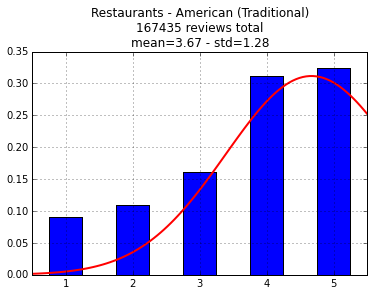

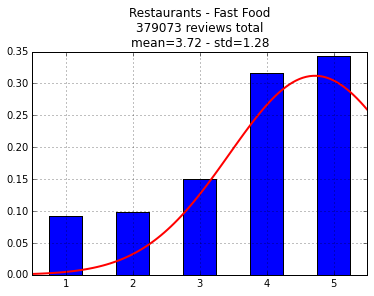

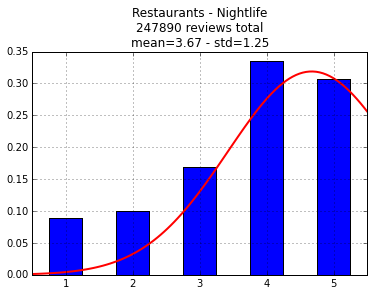

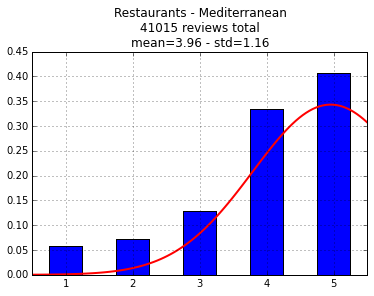

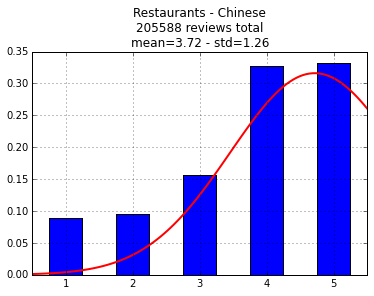

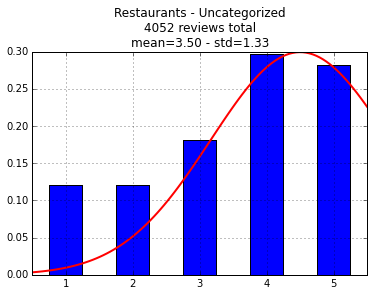

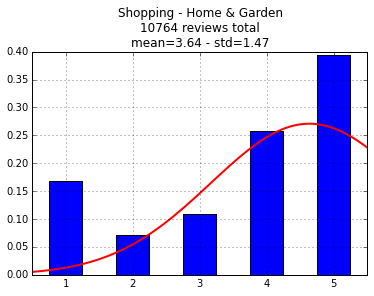

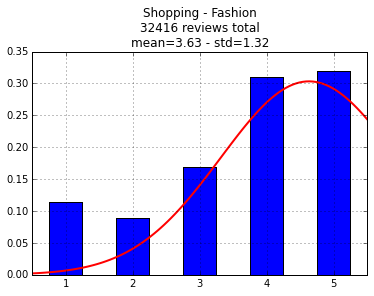

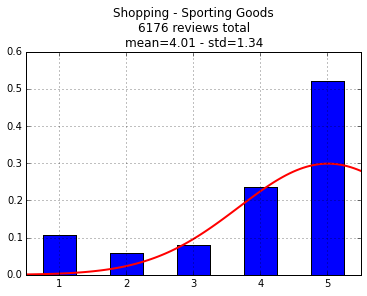

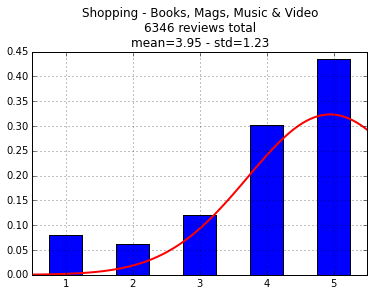

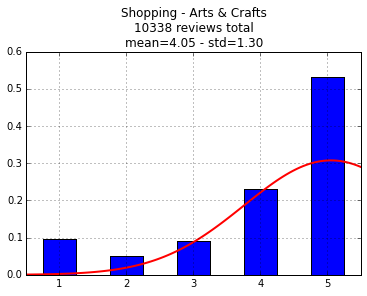

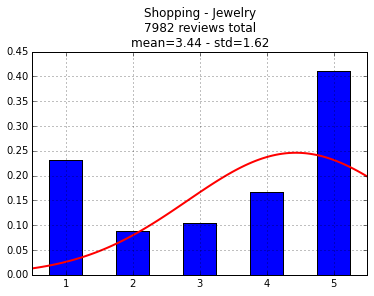

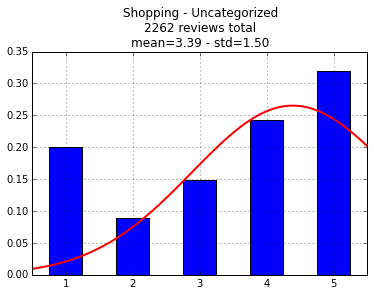

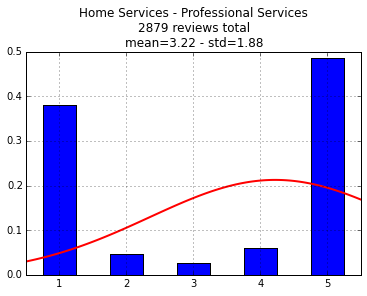

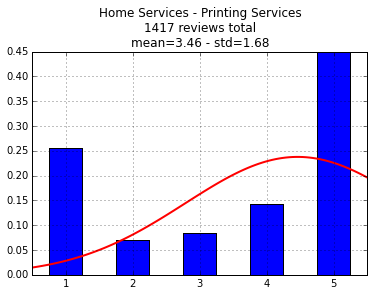

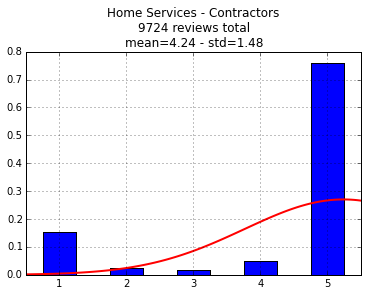

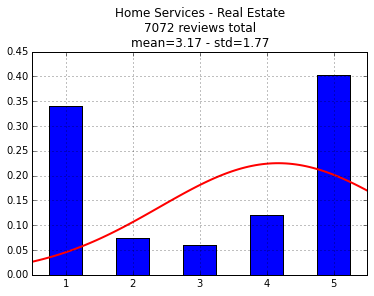

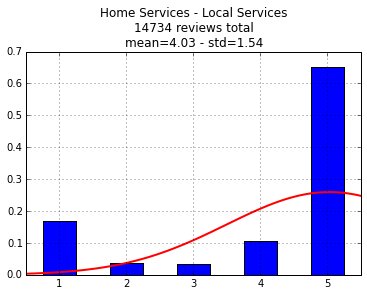

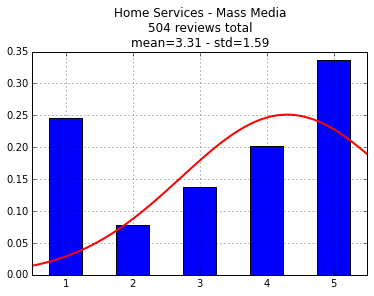

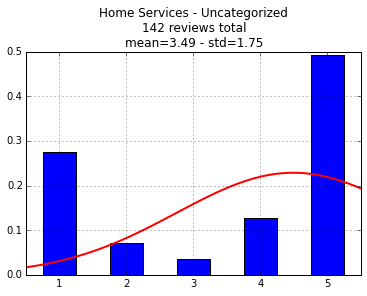

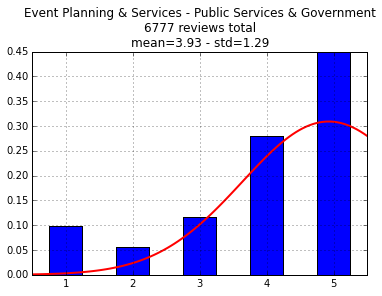

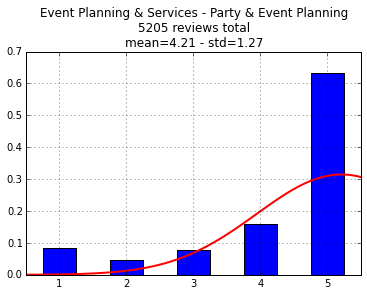

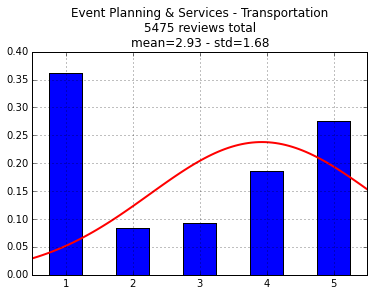

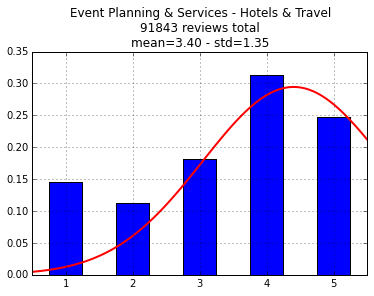

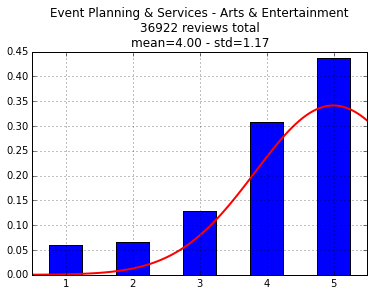

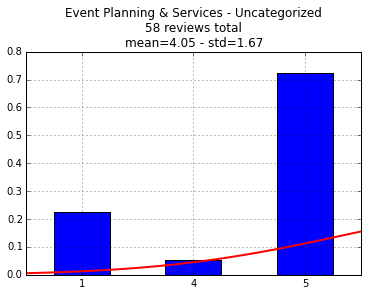

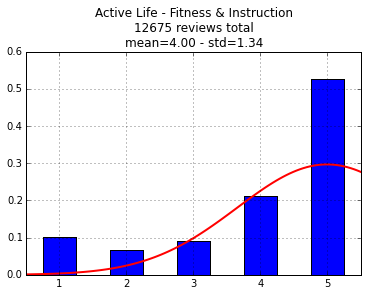

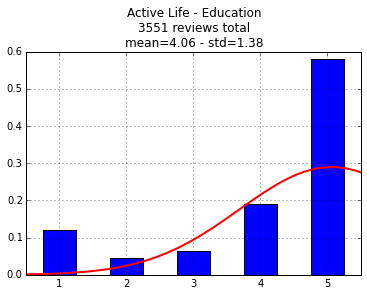

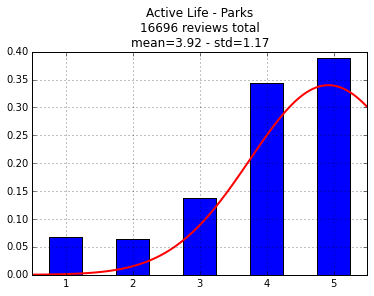

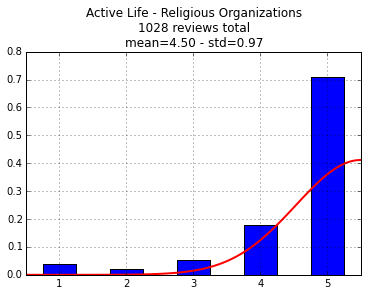

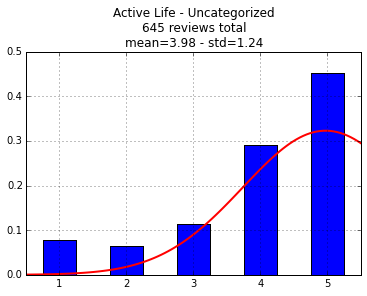

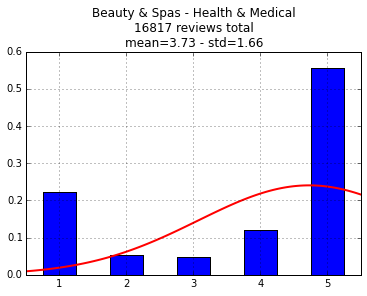

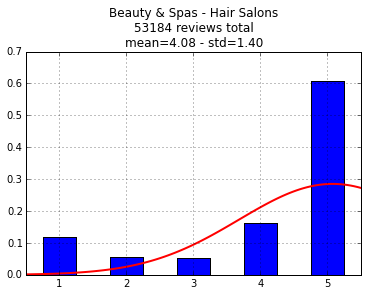

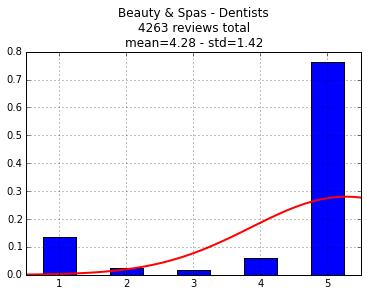

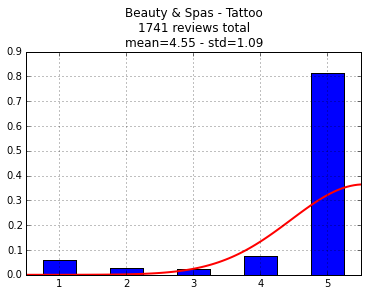

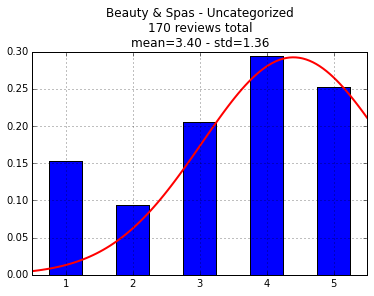

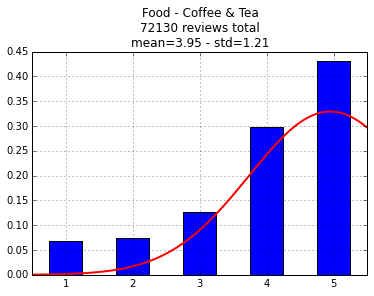

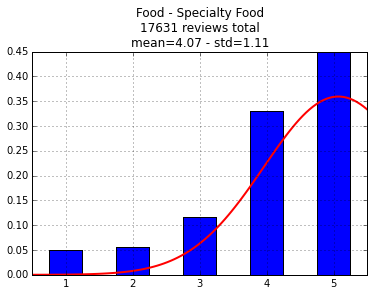

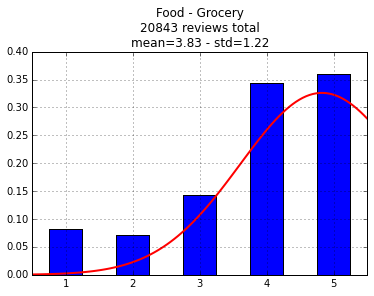

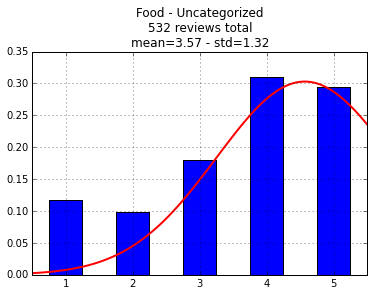

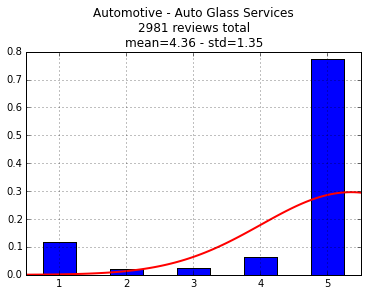

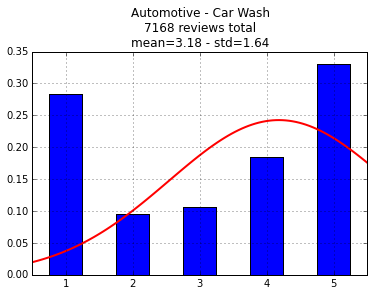

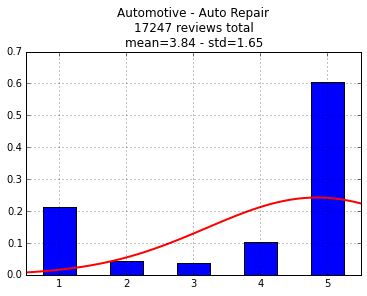

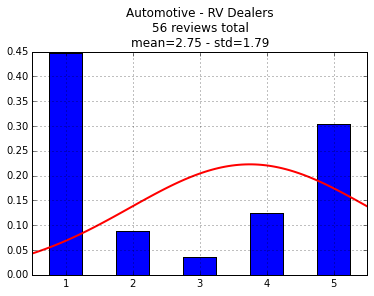

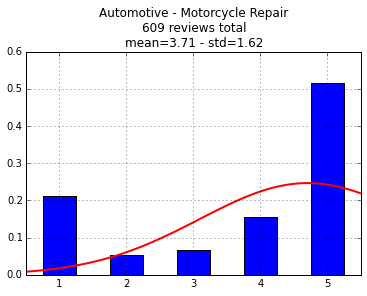

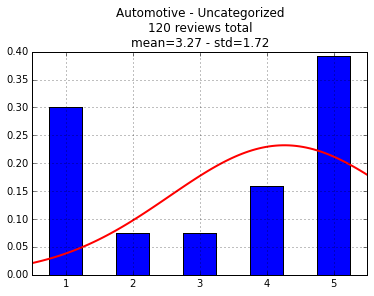

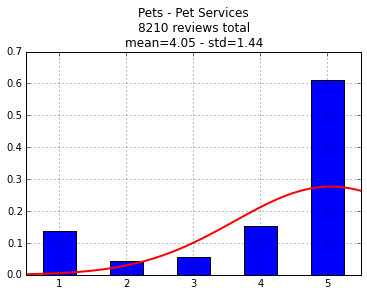

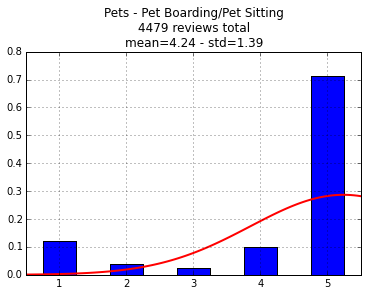

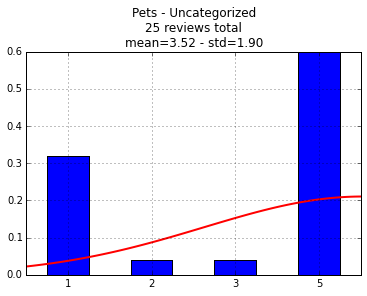

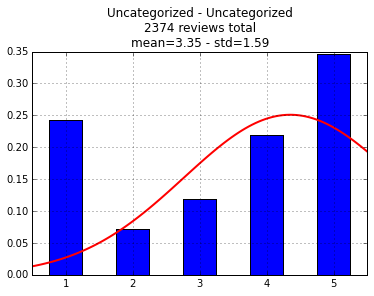

In [164]:
grouped = df_r.groupby(['super_category', 'sub_category'])['stars']
# Plot fun
for key in cat_dict:
    super_name = cat_dict[key]['name']
    
    sub_dict = cat_dict[key]['sub_categories']
    #sub cats
    for subkey in sub_dict:
        sub_name = sub_dict[subkey]['name']
        
        group = grouped.get_group((key,subkey))
        star_dist = group.value_counts().sort_index()
        normed = star_dist/star_dist.sum()
        pd.Series.plot(normed, kind='bar', rot='horizontal')
        
        bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]  # Bins for histogram
        # plt.hist(h, bins, normed=True)      #use this to draw histogram of your data
        
        # Put normal distribution over histogram
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, group.mean(), group.std())
        plt.plot(x, p, linewidth="2", color="red")
        
        # Add Kolmogorov smirnov test
        # (KS_D, KS_p) = stats.kstest(group.values, 'norm')
        
        # Info stuff
        line1 = "%s - %s" % (super_name, sub_name)
        line2 = "%i reviews total" % (group.count())
        line3 = "mean=%.2f - std=%.2f" % (group.mean(), group.std())
        plt.title(line1 + "\n" + line2 + "\n" + line3)
        
        plt.show()
        

#Distribution of Review means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydc.tools import import_data, review_analysis
from ydc.tools.supercats import add_supercats
%matplotlib inline

In [2]:
reviews = import_data.import_reviews(fields=['business_id', 'stars', 'date', 'real_date'])

In [3]:
businesses = import_data.import_businesses(fields=['business_id', 'stars', 'real_stars', 'categories'])

In [4]:
(businesses, box) = add_supercats(businesses)

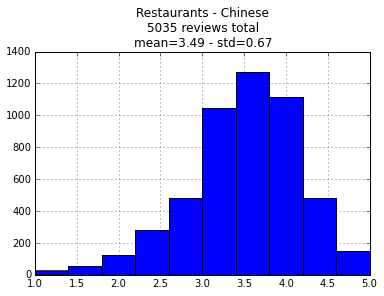

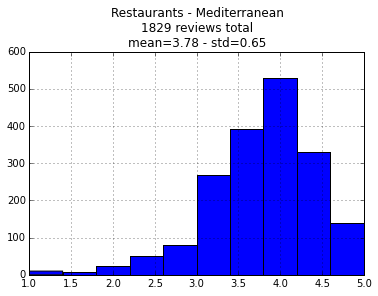

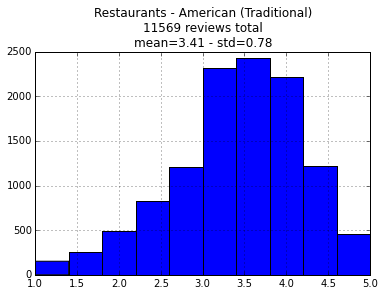

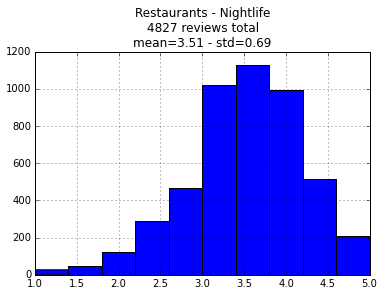

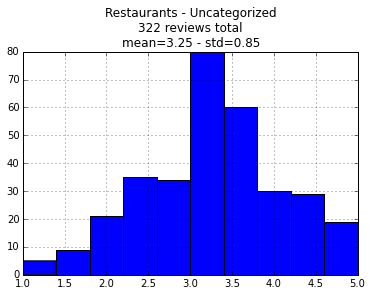

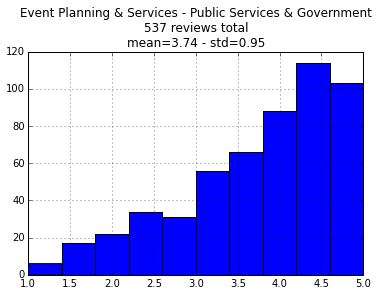

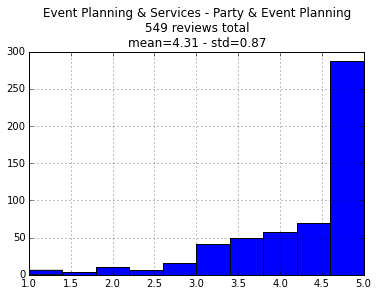

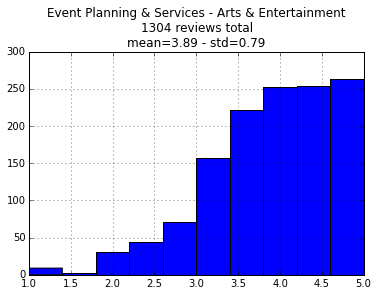

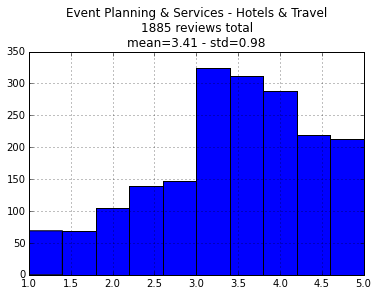

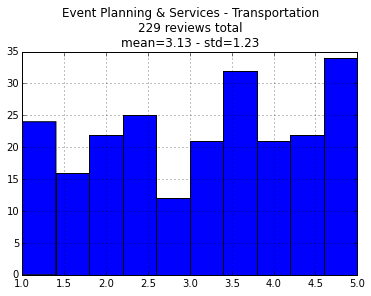

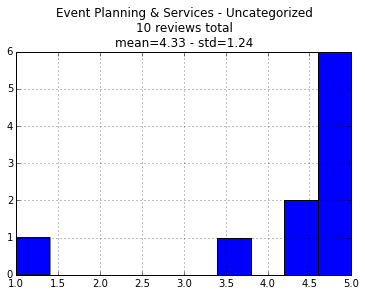

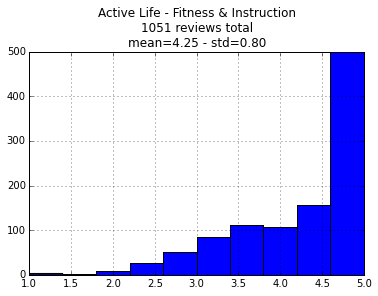

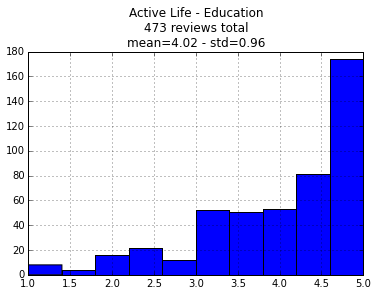

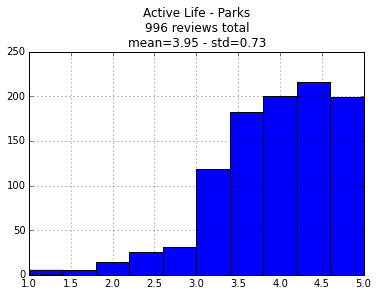

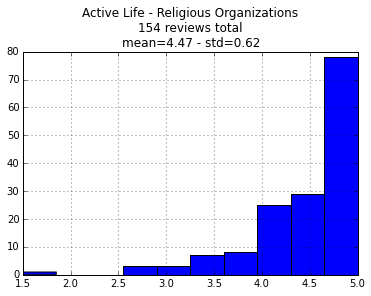

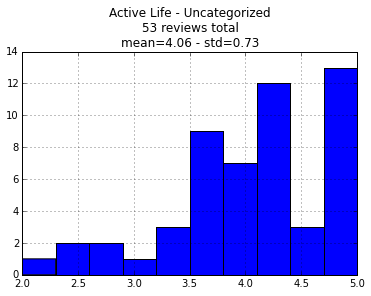

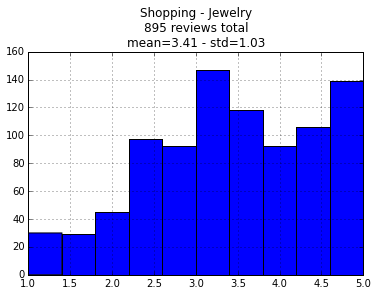

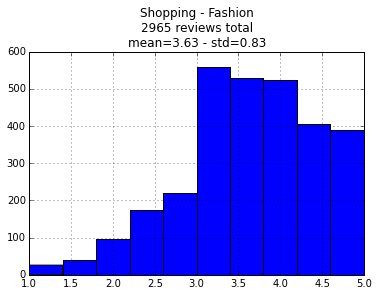

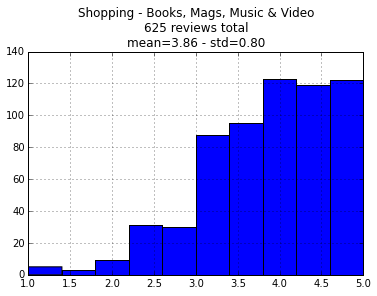

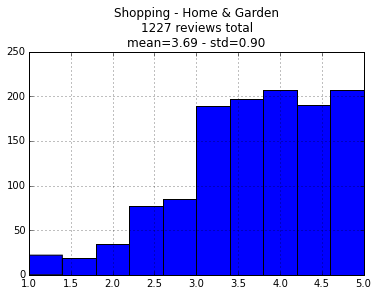

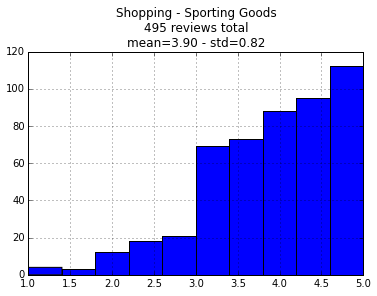

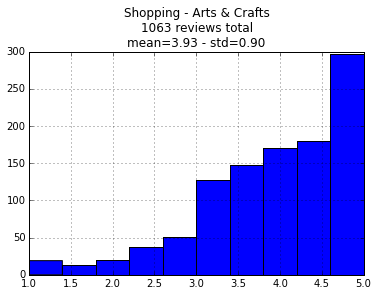

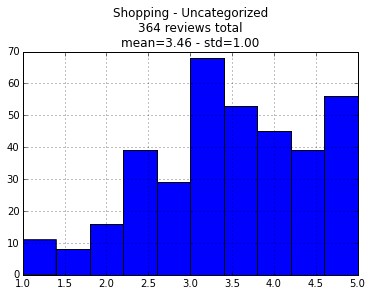

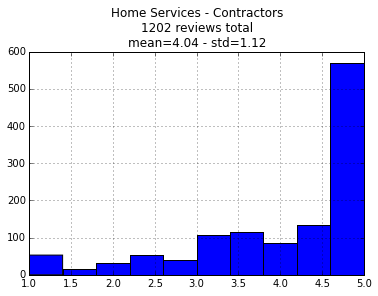

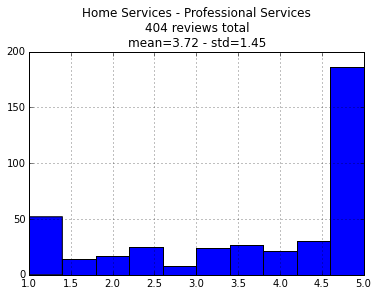

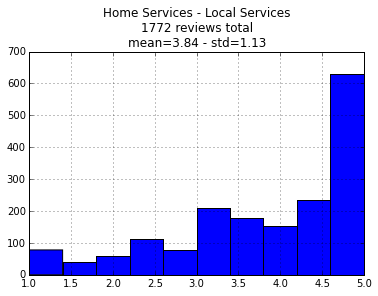

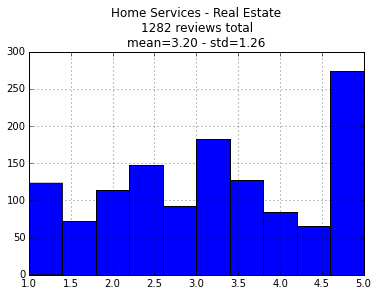

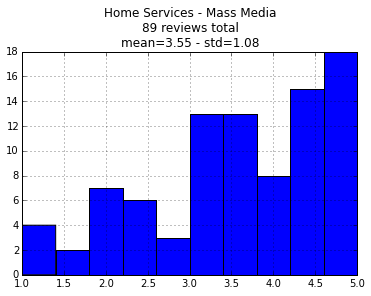

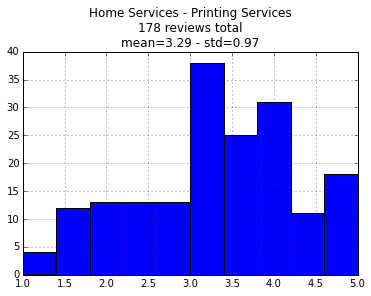

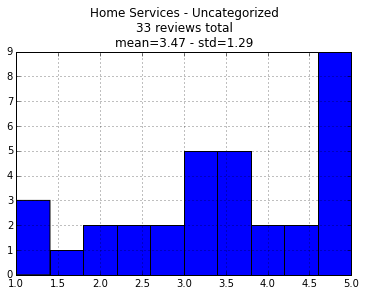

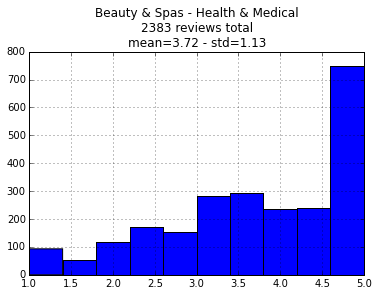

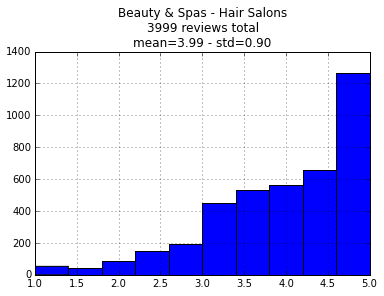

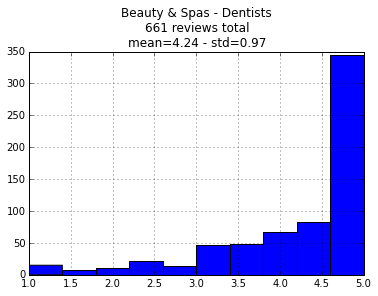

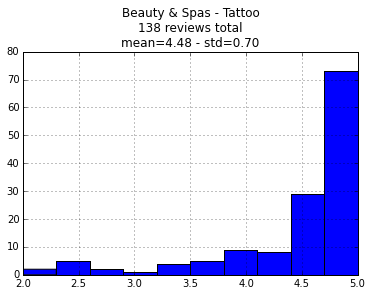

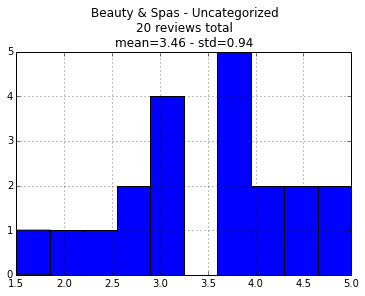

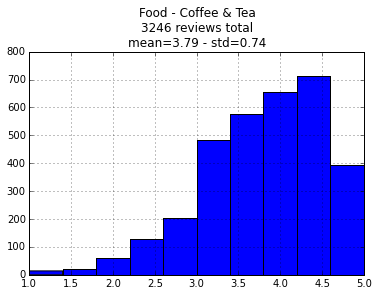

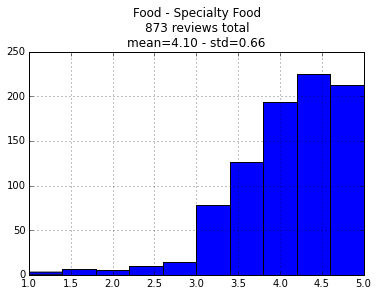

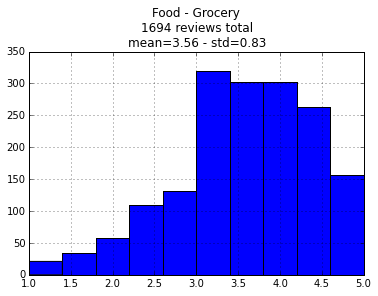

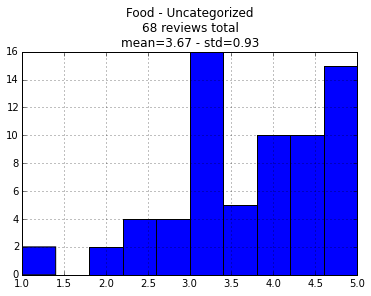

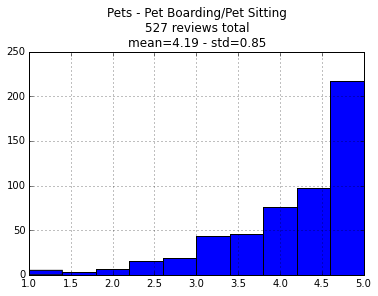

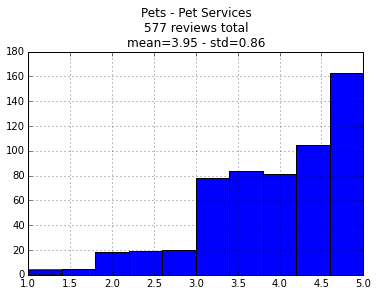

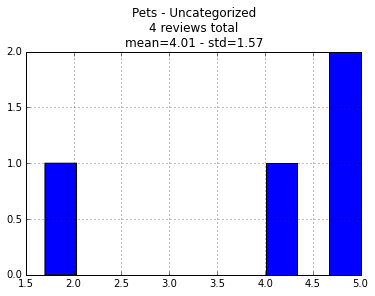

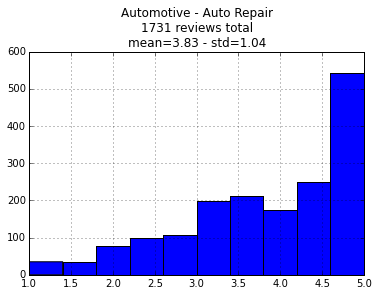

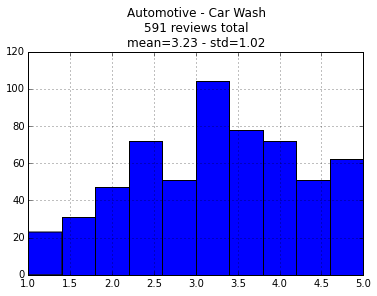

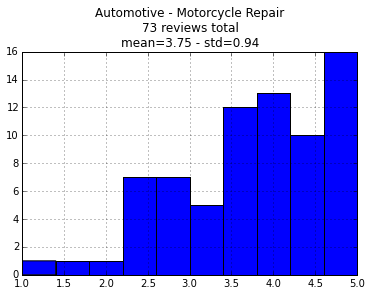

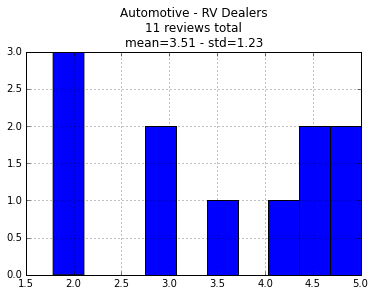

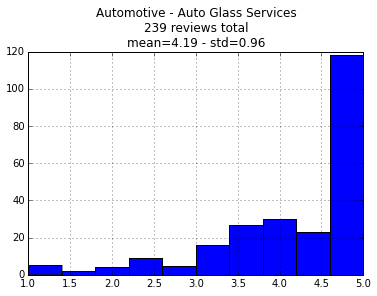

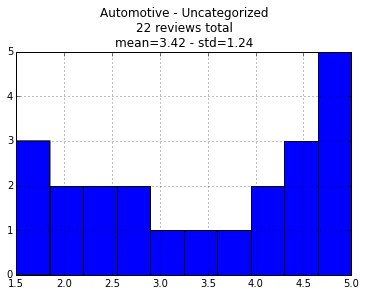

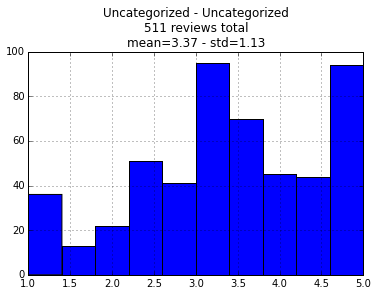

In [8]:
grouped = businesses.groupby(['super_category', 'sub_category'])['real_stars']
# Plot fun
for key in box:
    super_name = box[key]['name']
    
    sub_dict = box[key]['sub_categories']
    #sub cats
    for subkey in sub_dict:
        sub_name = sub_dict[subkey]['name']
        
        plt.figure()
        group = grouped.get_group((key,subkey))
        group.hist()
        #group[1].N.hist()
        
        
        # Info stuff
        line1 = "%s - %s" % (super_name, sub_name)
        line2 = "%i reviews total" % (group.count())
        line3 = "mean=%.2f - std=%.2f" % (group.mean(), group.std())
        plt.title(line1 + "\n" + line2 + "\n" + line3)
        
        plt.show()